# Построение сетей

In [41]:
import glob
import numpy as np
import paths

def average_network(folders_in, files_out):
    """
    Создание усредненной сети.
    
    :param folders_in: Папки, где хранятся сети.
    :param files_out: Файлы усредненных сетей.
    :return: 
    """
    states_0 = ['0bk', 'win', 'l', 'story', 'rnd', 'relation', 'neut']
    states_1 = ['2bk', 'loss', 'r', 'math', 'mental', 'match', 'fear']
    
    files = sorted(glob.glob(f'{folders_in[0]}/*') + glob.glob(f'{folders_in[1]}/*') +
                   glob.glob(f'{folders_in[2]}/*') + glob.glob(f'{folders_in[3]}/*'))
    files_0 = [file for file in files if any('_' + sub + '.npy' in file.split('/')[-1] for sub in states_0)]
    files_1 = [file for file in files if any('_' + sub + '.npy' in file.split('/')[-1] for sub in states_1)]

    A_0 = np.mean([np.load(file) for file in files_0], axis=0)
    A_1 = np.mean([np.load(file) for file in files_1], axis=0)

    np.save(files_out[0], A_0)
    np.save(files_out[1], A_1)

In [3]:
average_network(paths.folders_mean_ensemble_edges_test_wm, paths.average_network_wm)
average_network(paths.folders_pca_ensemble_edges_test_gambling, paths.average_network_gambling)
average_network(paths.folders_pca_ensemble_edges_test_motor, paths.average_network_motor)
average_network(paths.folders_pca_ensemble_edges_test_language, paths.average_network_language)
average_network(paths.folders_pca_ensemble_edges_test_social, paths.average_network_social)
average_network(paths.folders_pca_ensemble_edges_test_relational, paths.average_network_relational)
average_network(paths.folders_pca_ensemble_edges_test_emotion, paths.average_network_emotion)

In [8]:
# Проверим средний вес ребер сетей
print(np.mean(np.load(paths.average_network_wm[0])), np.mean(np.load(paths.average_network_wm[1])))
print(np.mean(np.load(paths.average_network_gambling[0])), np.mean(np.load(paths.average_network_gambling[1])))
print(np.mean(np.load(paths.average_network_motor[0])), np.mean(np.load(paths.average_network_motor[1])))
print(np.mean(np.load(paths.average_network_language[0])), np.mean(np.load(paths.average_network_language[1])))
print(np.mean(np.load(paths.average_network_social[0])), np.mean(np.load(paths.average_network_social[1])))
print(np.mean(np.load(paths.average_network_relational[0])), np.mean(np.load(paths.average_network_relational[1])))
print(np.mean(np.load(paths.average_network_emotion[0])), np.mean(np.load(paths.average_network_emotion[1])))

-0.22190429865818145 0.2219857863191833
-0.10027654142658776 0.09921072798640121
-0.26396086720782747 0.2633400991088735
-0.4430803067763874 0.4440456337671121
-0.20582439728027807 0.20582292912049088
-0.22488466799740423 0.2239682677137376
-0.07763506409183514 0.07836254356031457


# Исследование глобальных характеристик сетей

Исследуем распределение весов ребер.

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import paths

def weight_distribution(file0, file1, quantiles, bins=75, shift=False):
    """
    Изображение распределений весов ребер двух ансамблевых графов.
    
    :param file0: Файл графа первого состояния.
    :param file1: Файл графа второго состояния.
    :param quantiles: Квантили, которые нужно изобразить. 
    :param bins: Число столбцов в гистограмме.
    :param shift: Нужно ли делать сдвиг весов.
    :return: 
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if shift:
        matrices = [(np.load(file0) + 1) / 2, (np.load(file1) + 1) / 2]
    else:
        matrices = [np.load(file0), np.load(file1)]
    titles = [file0.split('/')[-1][:-4], file1.split('/')[-1][:-4]]
    
    for ax, mat, title, qs in zip(axes, matrices, titles, [1 - np.array(quantiles), np.array(quantiles)]):
        # Заменяем диагональные элементы на NaN
        np.fill_diagonal(mat, np.nan)
        # Получаем веса в виде одномерного массива и отфильтровываем NaN
        weights = mat.flatten()
        weights = weights[~np.isnan(weights)]
        
        # Вычисляем заданный квантиль
        q_values = np.quantile(weights, qs)
        
        # Строим гистограмму распределения весов
        ax.hist(weights, bins=bins, alpha=0.7, color='skyblue', edgecolor='black')
        for q, q_value in zip(qs, q_values):
            ax.axvline(q_value, color='red', linestyle='dashed', linewidth=1.5,
                       label=f'Quantile {q:.2f}: {q_value:.3f}')

        ax.set_xlabel('Weight')
        ax.set_ylabel('Frequency')
        ax.set_title(title)
        ax.legend()
    
    plt.tight_layout()
    plt.show()

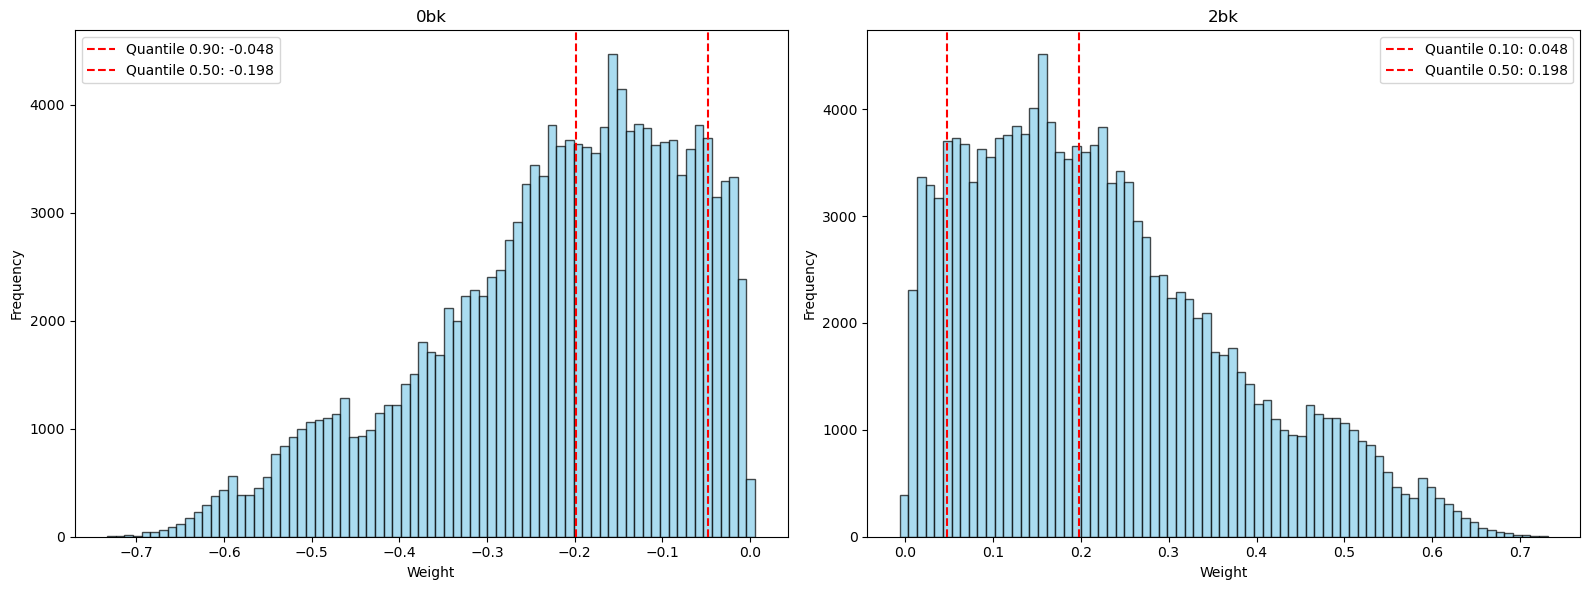

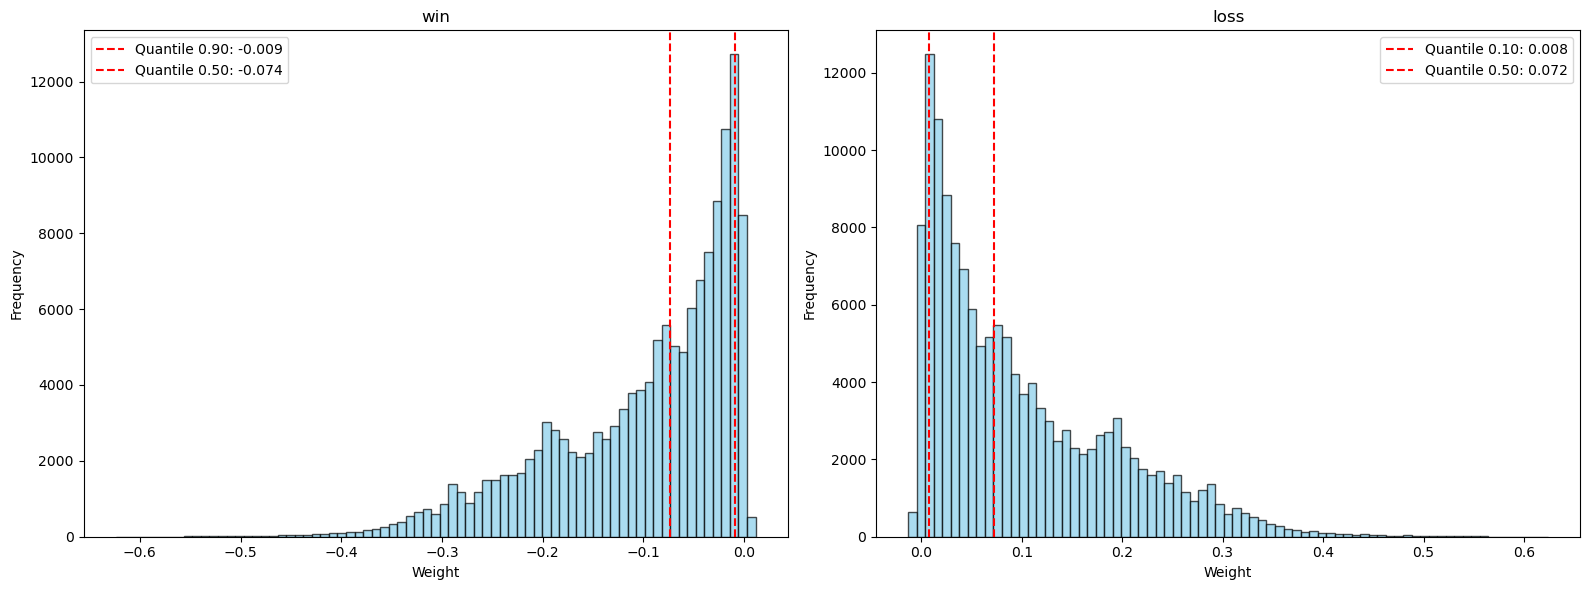

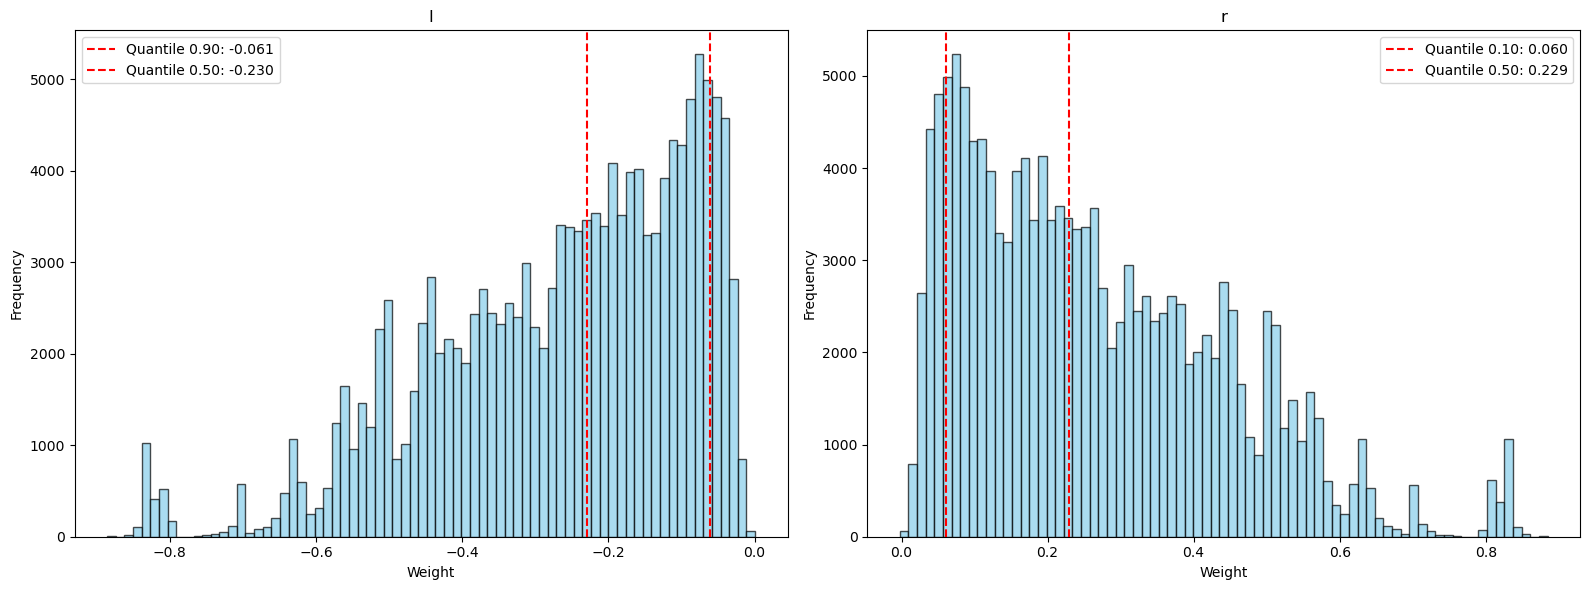

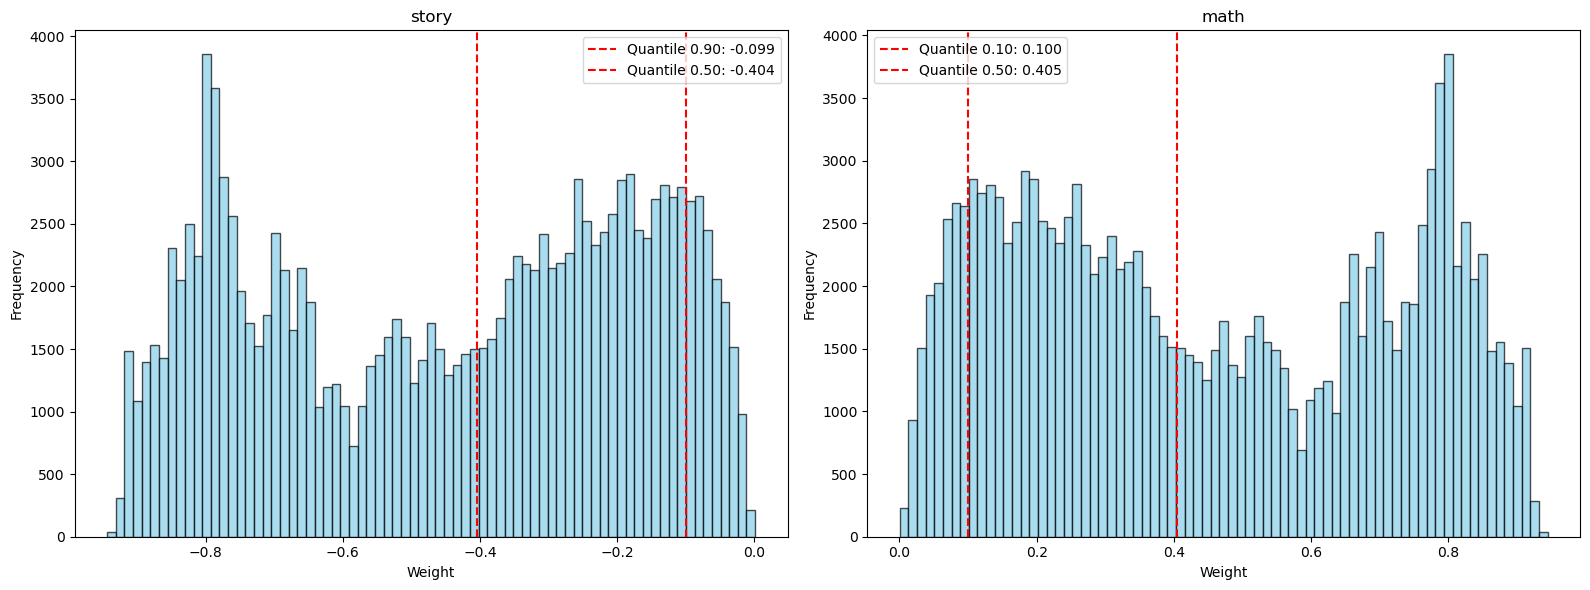

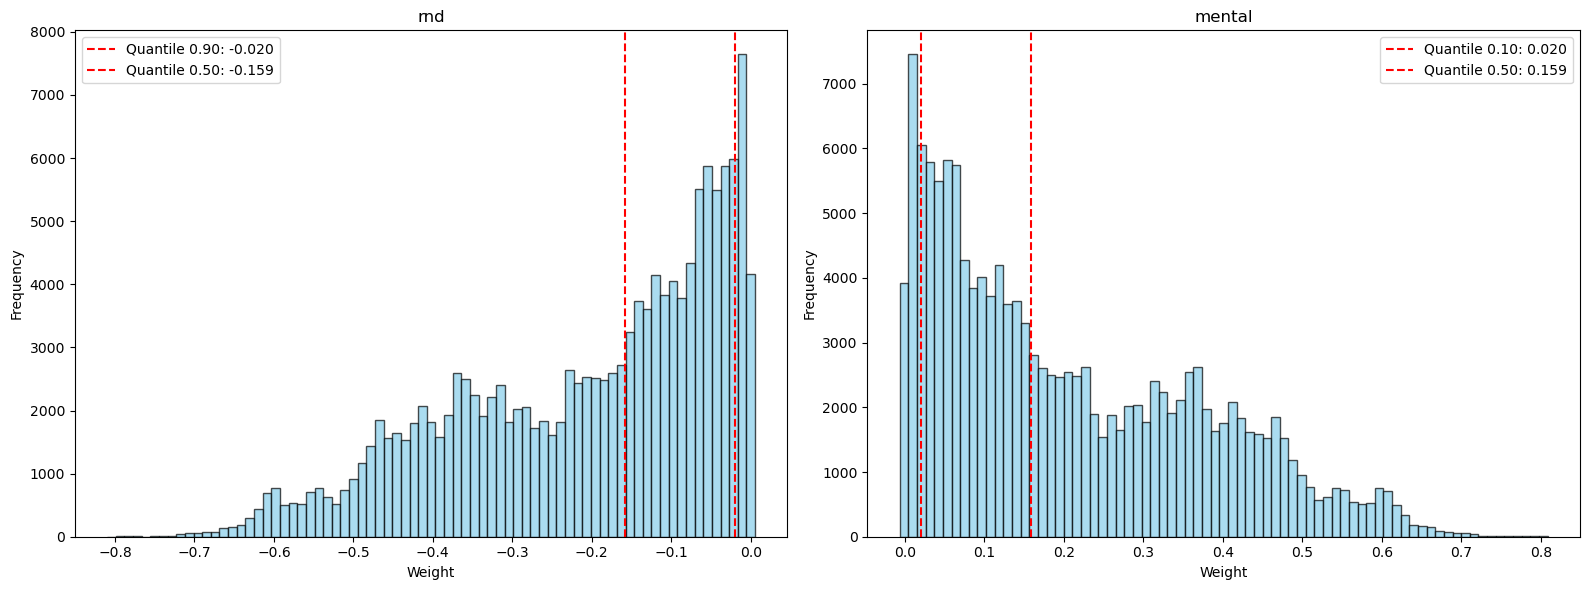

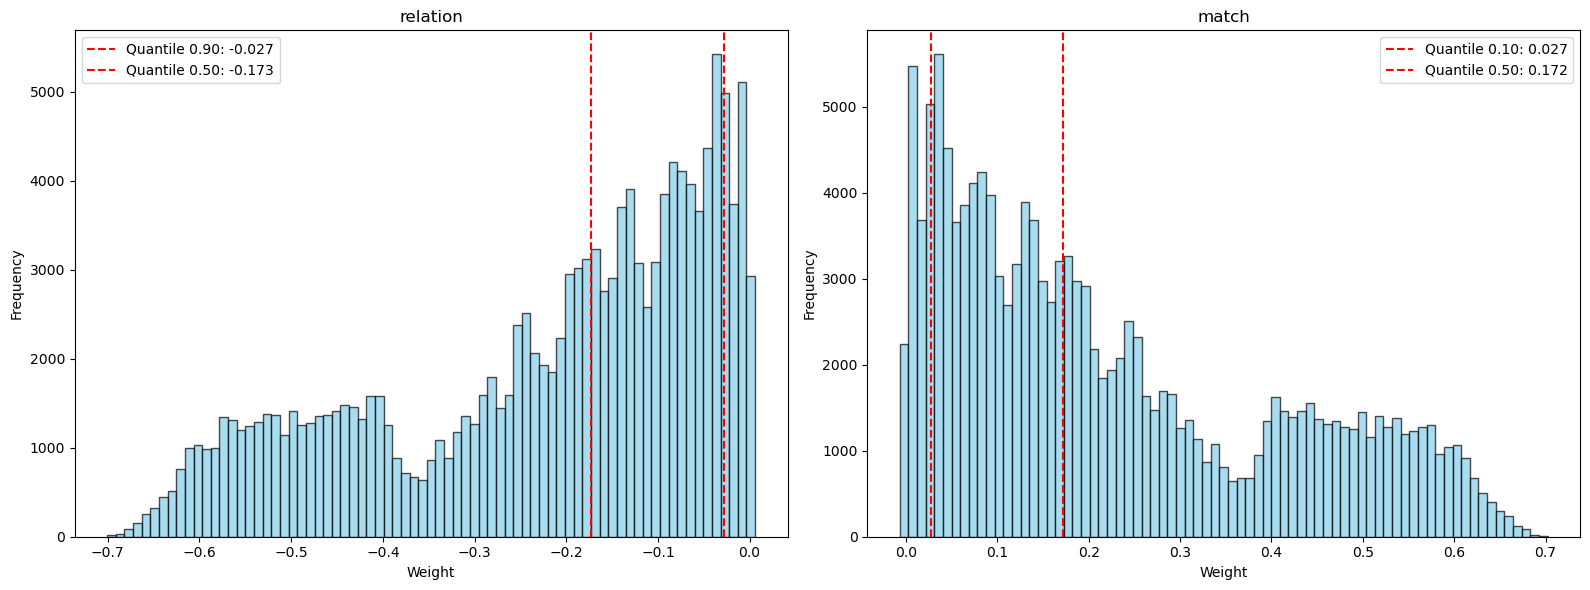

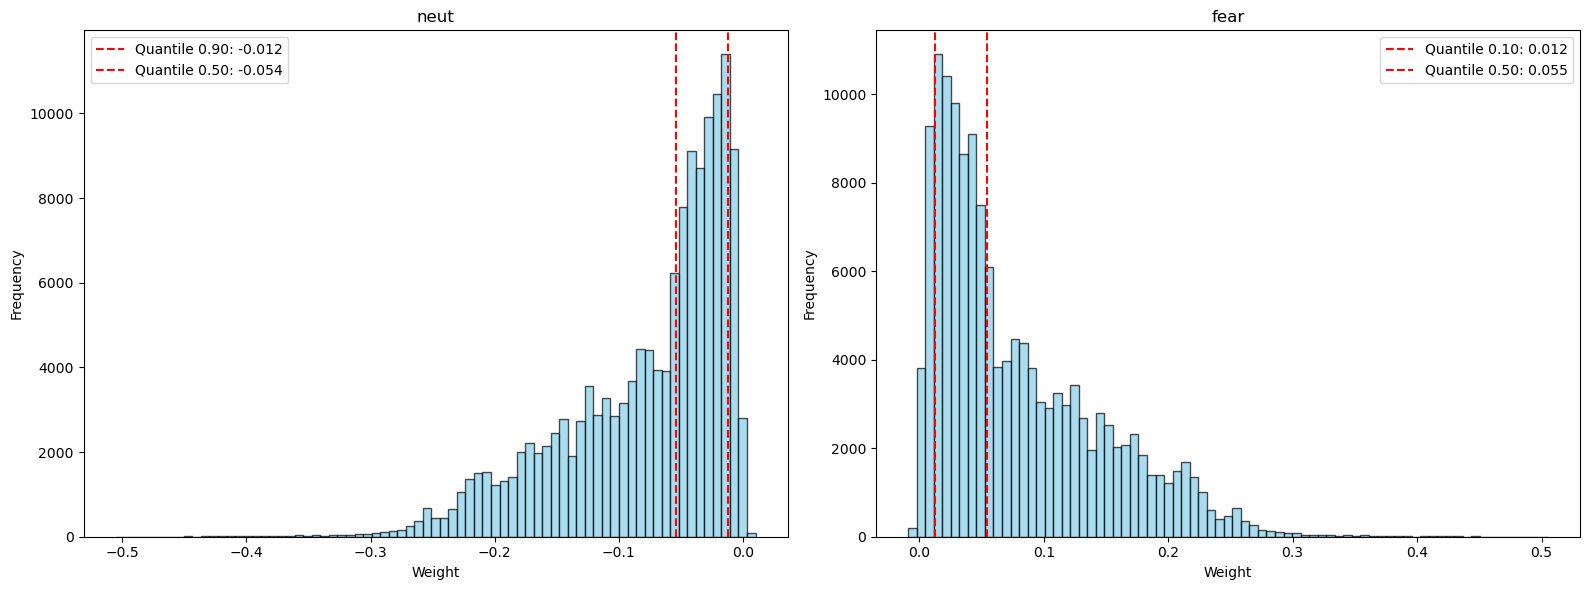

In [60]:
quantiles = [0.1, 0.5]
weight_distribution(paths.average_network_wm[0], paths.average_network_wm[1], quantiles)
weight_distribution(paths.average_network_gambling[0], paths.average_network_gambling[1], quantiles)
weight_distribution(paths.average_network_motor[0], paths.average_network_motor[1], quantiles)
weight_distribution(paths.average_network_language[0], paths.average_network_language[1], quantiles)
weight_distribution(paths.average_network_social[0], paths.average_network_social[1], quantiles)
weight_distribution(paths.average_network_relational[0], paths.average_network_relational[1], quantiles)
weight_distribution(paths.average_network_emotion[0], paths.average_network_emotion[1], quantiles)

Во-первых, я решил пока продолжить исследование графов без фильтрации. Во-вторых, чтобы не переизобретать велосипед я сдвину веса ребер от диапазона [-1, 1], до [0, 1], тонда не будет проблем с многими сетевыми метриками.  

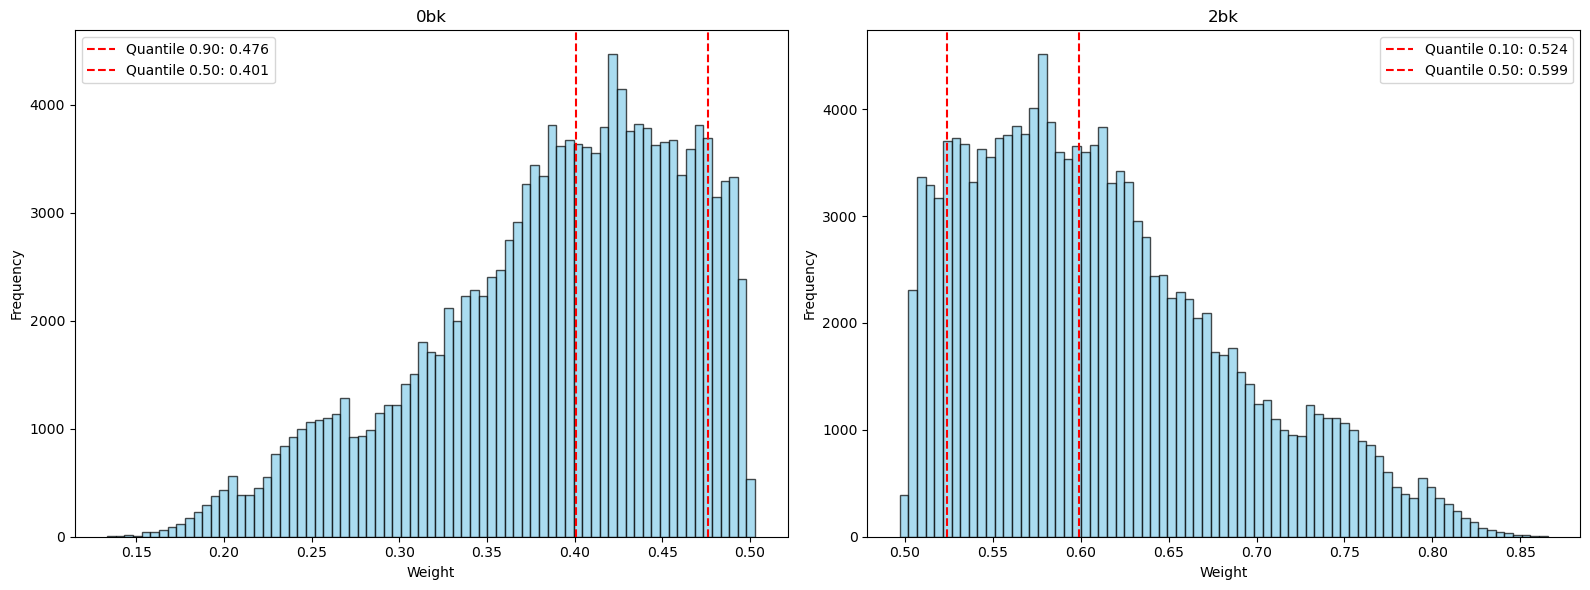

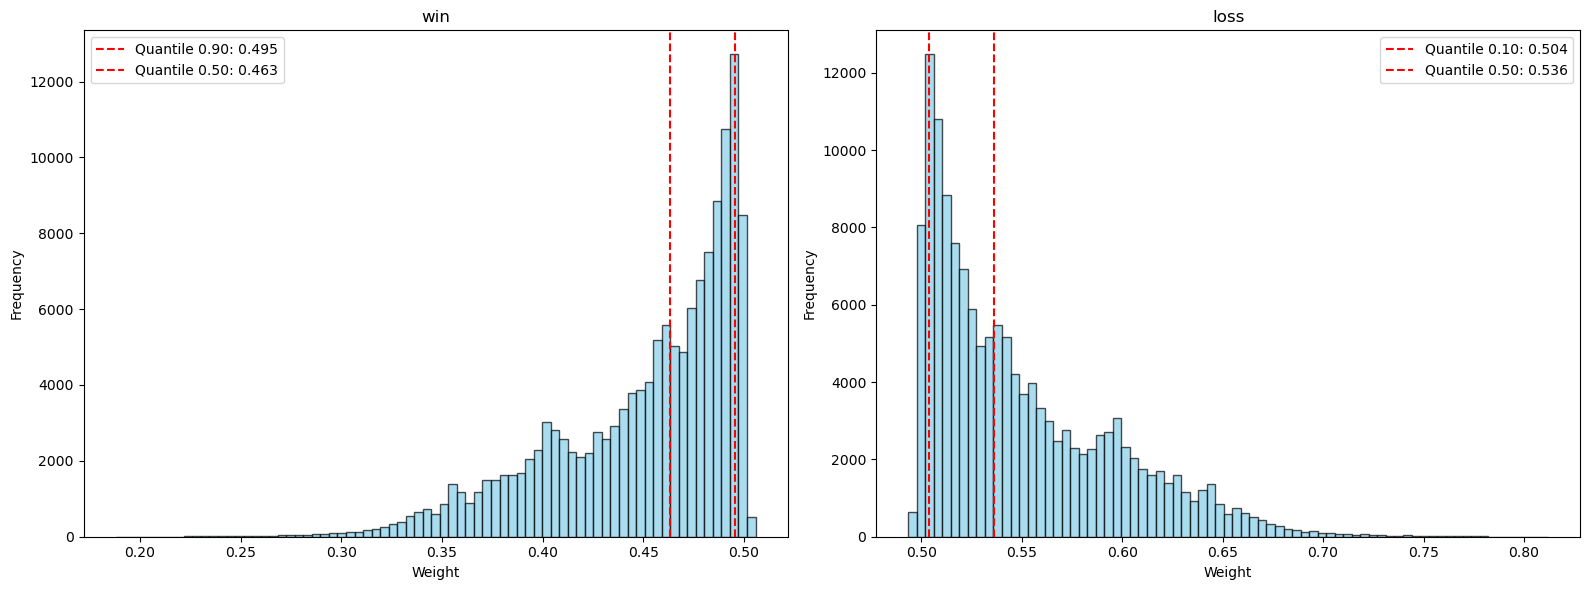

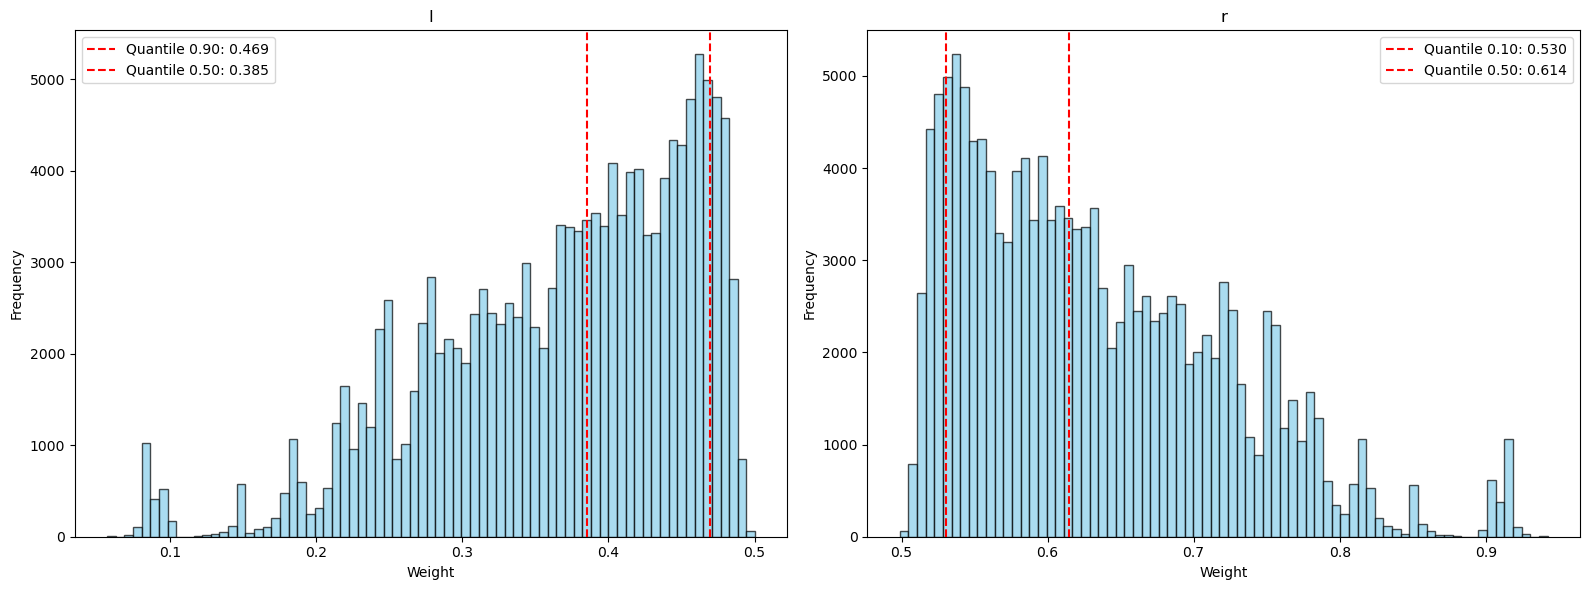

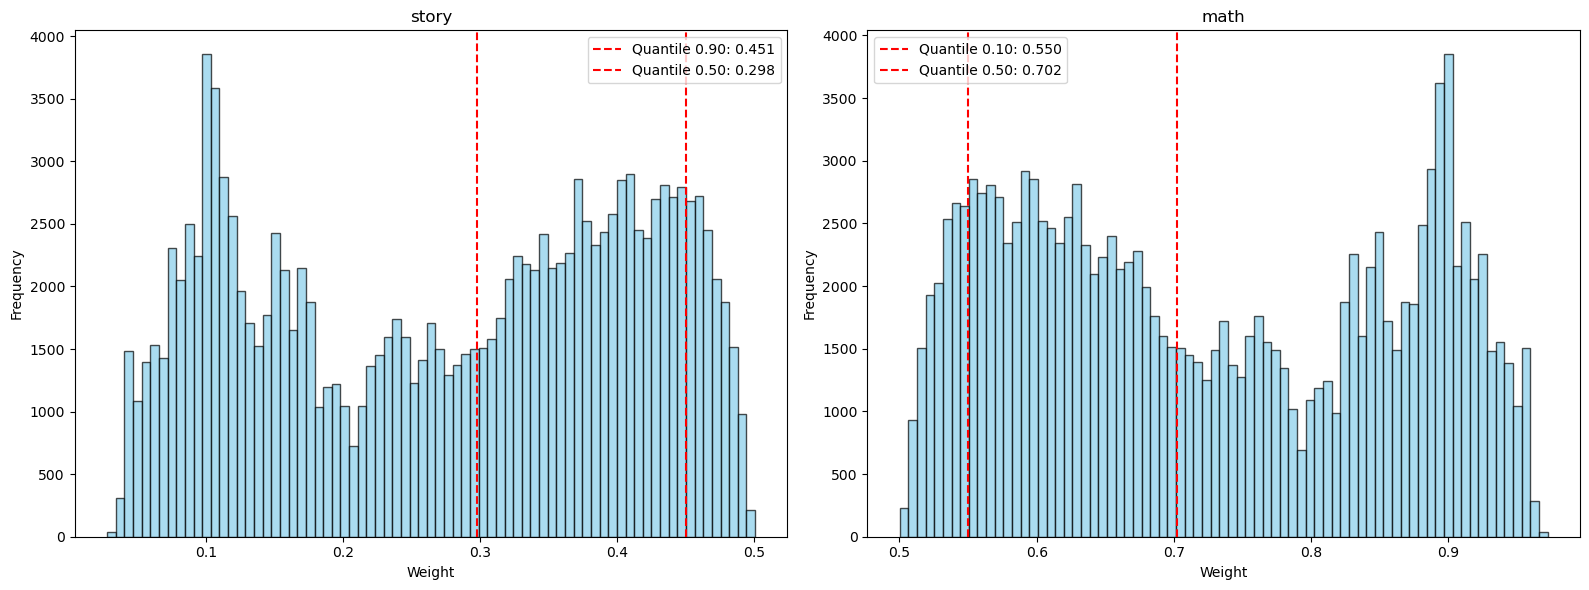

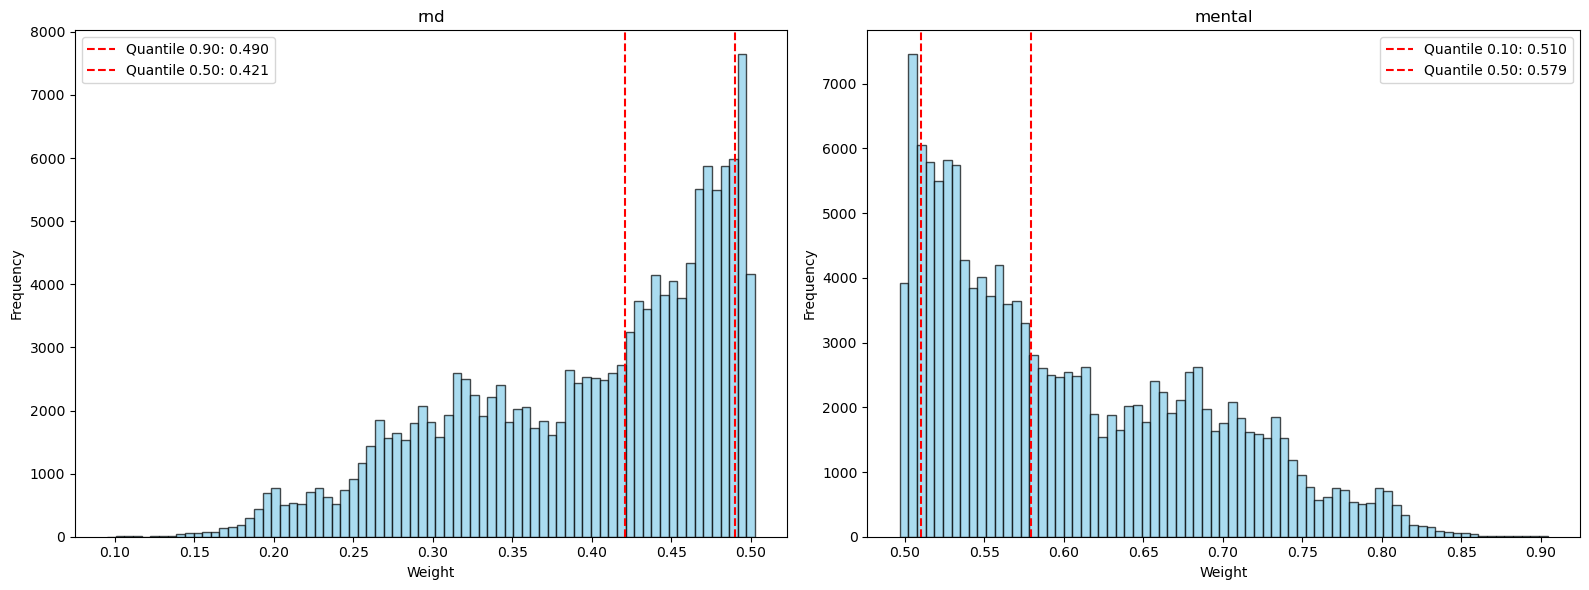

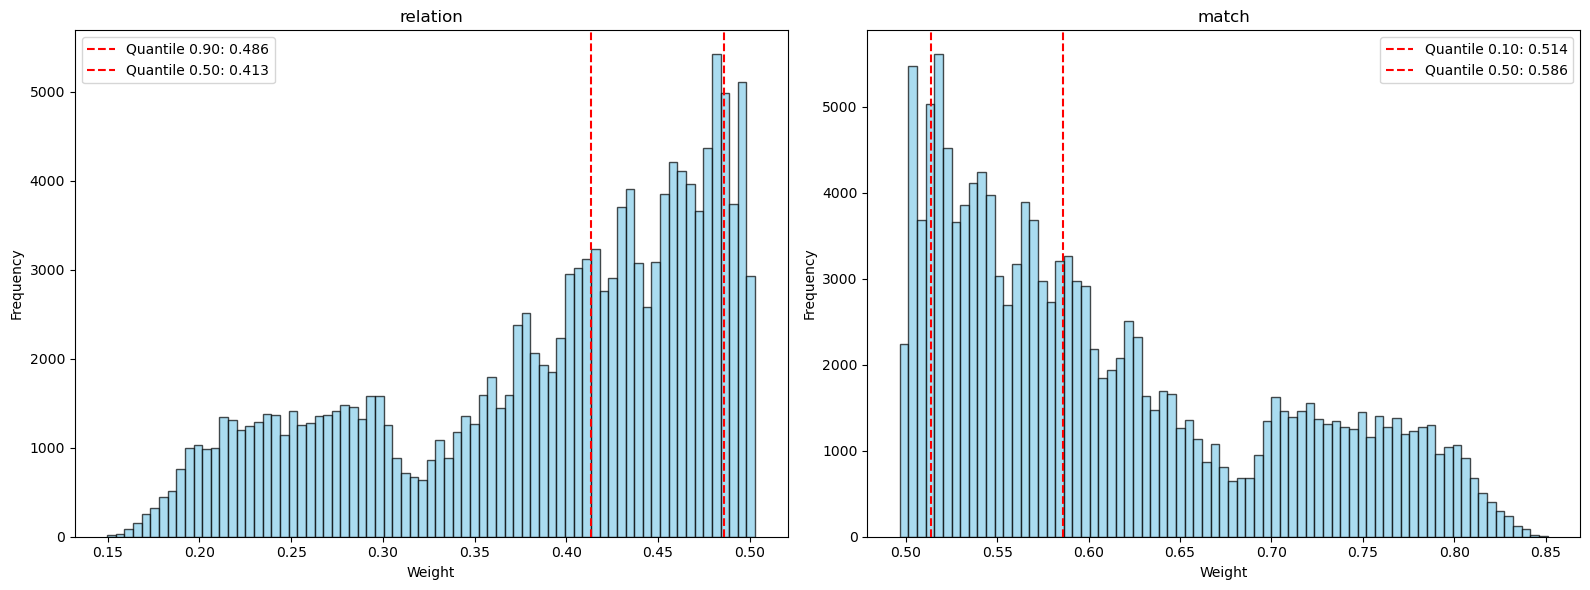

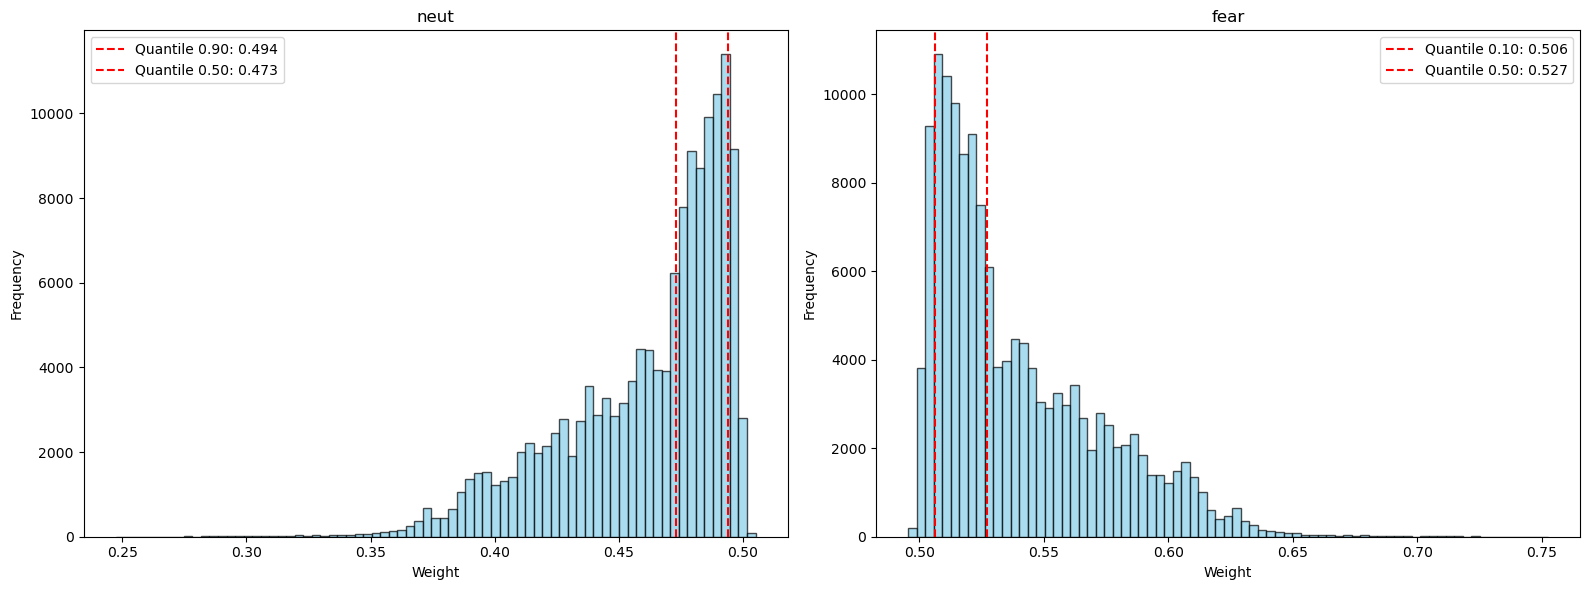

In [61]:
quantiles = [0.1, 0.5]
weight_distribution(paths.average_network_wm[0], paths.average_network_wm[1], quantiles, shift=True)
weight_distribution(paths.average_network_gambling[0], paths.average_network_gambling[1], quantiles, shift=True)
weight_distribution(paths.average_network_motor[0], paths.average_network_motor[1], quantiles, shift=True)
weight_distribution(paths.average_network_language[0], paths.average_network_language[1], quantiles, shift=True)
weight_distribution(paths.average_network_social[0], paths.average_network_social[1], quantiles, shift=True)
weight_distribution(paths.average_network_relational[0], paths.average_network_relational[1], quantiles, shift=True)
weight_distribution(paths.average_network_emotion[0], paths.average_network_emotion[1], quantiles, shift=True)

In [62]:
import networkx as nx

G_wm0, G_wm1 = (nx.from_numpy_array((np.load(paths.average_network_wm[0]) + 1) / 2), 
                nx.from_numpy_array((np.load(paths.average_network_wm[1]) + 1) / 2))
G_gambling0, G_gambling1 = (nx.from_numpy_array((np.load(paths.average_network_gambling[0]) + 1) / 2), 
                            nx.from_numpy_array((np.load(paths.average_network_gambling[1]) + 1) / 2))
G_motor0, G_motor1 = (nx.from_numpy_array((np.load(paths.average_network_motor[0]) + 1) / 2), 
                      nx.from_numpy_array((np.load(paths.average_network_motor[1]) + 1) / 2))
G_language0, G_language1 = (nx.from_numpy_array((np.load(paths.average_network_language[0]) + 1) / 2), 
                            nx.from_numpy_array((np.load(paths.average_network_language[1]) + 1) / 2))
G_social0, G_social1 = (nx.from_numpy_array((np.load(paths.average_network_social[0]) + 1) / 2), 
                        nx.from_numpy_array((np.load(paths.average_network_social[1]) + 1) / 2))
G_relational0, G_relational1 = (nx.from_numpy_array((np.load(paths.average_network_relational[0]) + 1) / 2), 
                                nx.from_numpy_array((np.load(paths.average_network_relational[1]) + 1) / 2))
G_emotion0, G_emotion1 = (nx.from_numpy_array((np.load(paths.average_network_emotion[0]) + 1) / 2), 
                          nx.from_numpy_array((np.load(paths.average_network_emotion[1]) + 1) / 2))

Нет особого смысла исследовать и интерпретировать метрики расстояния на полном графе, который при этом еще и является графом связности. Поэтому мы их пропустим. 

Интересно исследовать 1) распределение степеней (+ асортативность), 2) центральности вершин, 3) коэффициенты кластеризации (аккуратно с методом вычисления), 4) похожесть вершин, 5) похожесть на знаменитые модели, 6) определение кластеров, 7) дистанции как-нибудь 